In [1]:
import rml
import tadasets
import gudhi                as gd
import matplotlib.pyplot    as plt
import numpy                as np
import warnings
from scipy.optimize         import newton
from sklearn.neighbors      import KDTree
from scipy.sparse           import csr_matrix
from scipy.sparse.csgraph   import dijkstra
from sklearn.decomposition  import PCA
warnings.filterwarnings("ignore")


In [2]:
swiss = tadasets.swiss_roll(n=1000)
swiss = swiss[:, [1, 2, 0]]

In [2]:
pointx = np.random.uniform(size=[1000, 1])
pointy = np.random.uniform(size=[1000, 1])
point = np.hstack([pointx, pointy, np.zeros([1000, 1])])

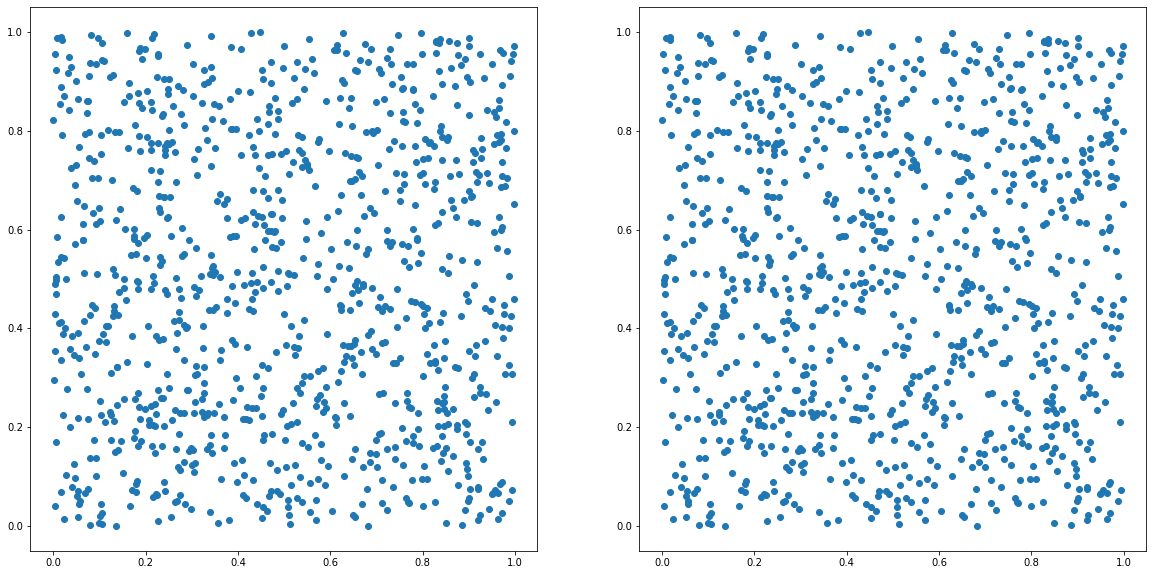

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].scatter(point[:, 0], point[:, 1])
axes[1].scatter(point[:, 0], point[:, 1])

In [27]:

x=np.linspace(-1, 1, 30)
y=np.linspace(-1, 1, 30)
xx,yy=np.meshgrid(x,y)
point0=np.array((xx.ravel(), yy.ravel())).T
point0 = np.hstack([point0, np.zeros([len(point0), 1])])

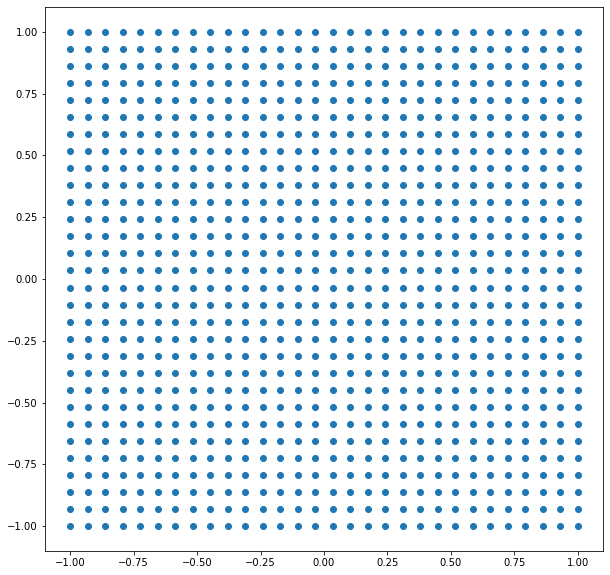

In [28]:
plt.figure(figsize=(10, 10))
plt.scatter(point0[:, 0], point0[:, 1])

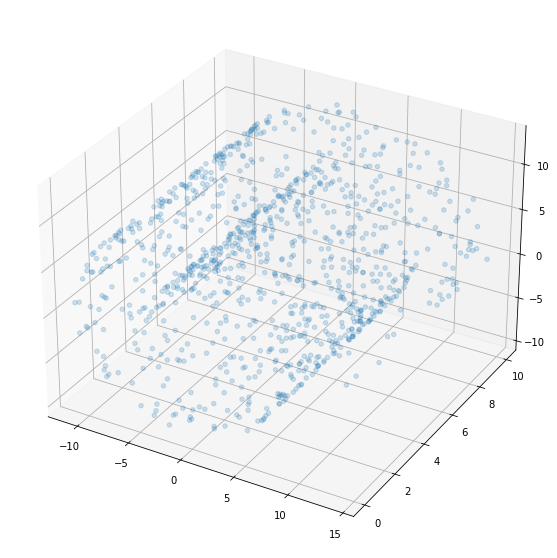

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection = '3d')
ax.scatter3D(swiss[:, 0], swiss[:, 1], swiss[:, 2], alpha=0.2)

In [29]:
S = rml.Simplex()
S.build_simplex(point0, k=10, threshold_var=0.08, edge_sen=1)
e = S.normal_coords()

p_idx : 465
891


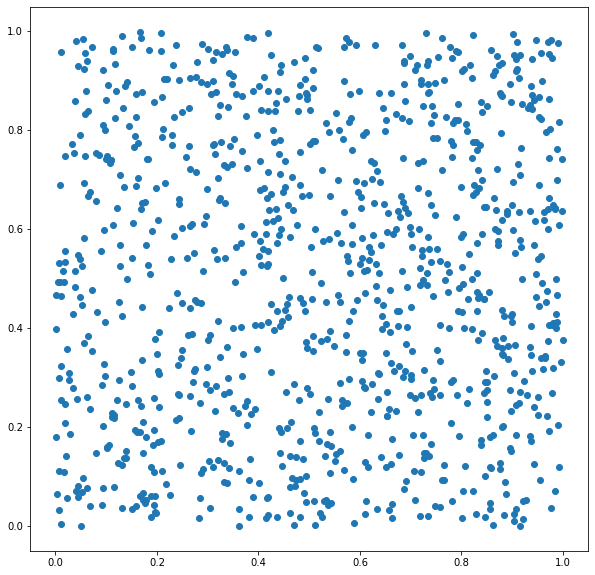

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(point[:,0], point[:, 1])

In [30]:
E = S.coords[e]
EE = S.pointcloud[e]

'\nfor c, i in enumerate(S.o):\n    if c % 1 == 0:\n        plt.text(point[i,0]+.03, point[i,1]+.03, str(c), fontsize=9)\n    if c > 100:\n        break\n'

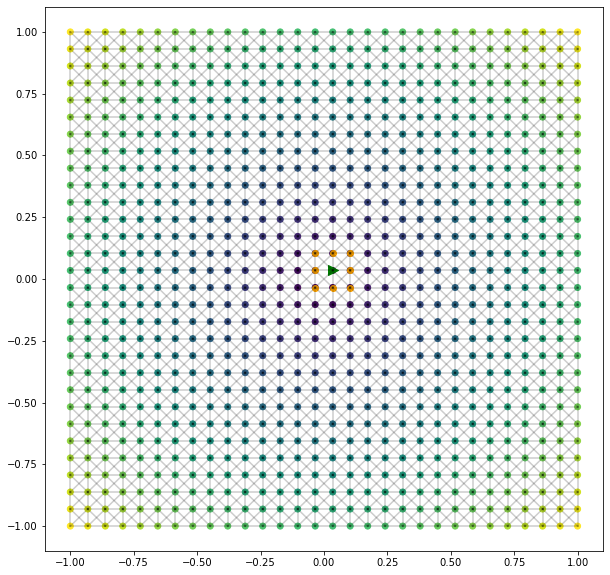

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(point0[:,0], point0[:, 1], c=np.linalg.norm(point0, axis=1))
plt.scatter(EE[:, 0], EE[:, 1], color='orange')
plt.scatter(point0[465,0], point0[465, 1], marker='>', color='g', s=100)
for i in range(len(S.pointcloud)):
    for k in S.edges[i]:
        plt.plot([S.pointcloud[i][0], S.pointcloud[k][0]],[S.pointcloud[i][1], S.pointcloud[k][1]], color='black', alpha=0.1)
"""
for c, i in enumerate(S.o):
    if c % 1 == 0:
        plt.text(point[i,0]+.03, point[i,1]+.03, str(c), fontsize=9)
    if c > 100:
        break
"""

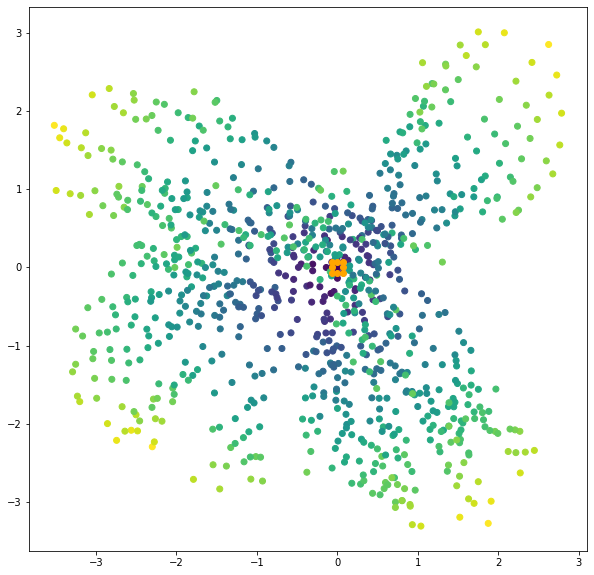

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(S.coords[:, 0], S.coords[:, 1], c=np.linalg.norm(S.pointcloud, axis=1))
plt.scatter(E[:, 0], E[:, 1], color='orange')

In [9]:
np.sum(S.coords[:, 0] ==0)

952

In [2]:
sphere = tadasets.sphere(n=1000)

In [9]:
S = rml.Simplex()
S.build_simplex(swiss, k=10, threshold_var=0.08, edge_sen=1)
e = S.normal_coords()

p_idx : 732
849


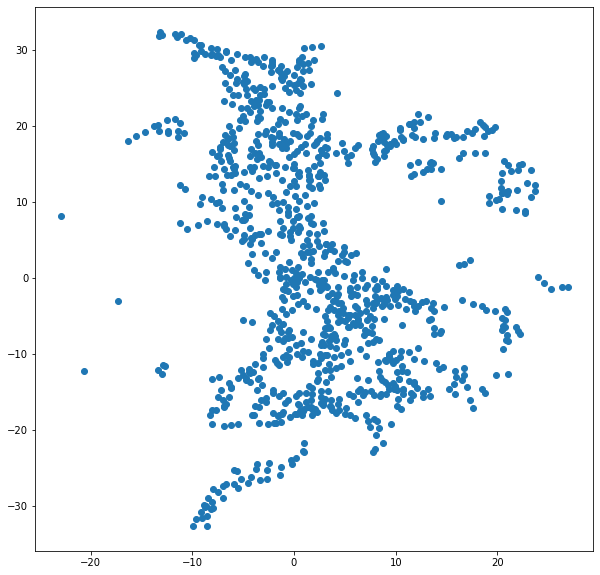

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(S.coords[:, 0], S.coords[:, 1])

In [12]:
sphere = tadasets.sphere(n=2000)
sphere = sphere[sphere[:, 2]>=0]
print(len(sphere))

995


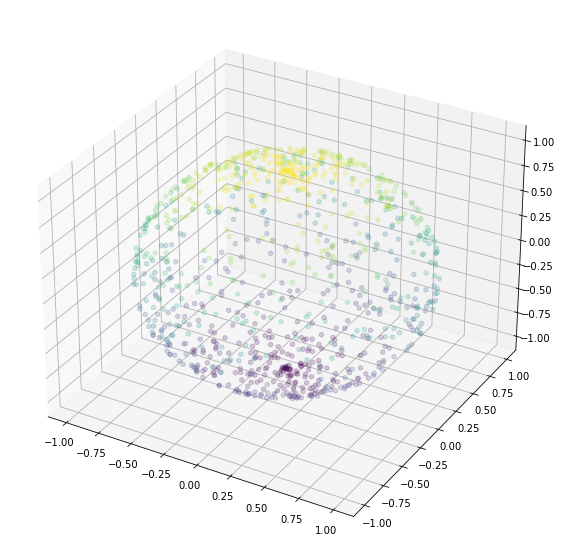

In [10]:
fig = plt.figure(figsize=(10, 10))
#ax = plt.subplot(224, projection='3d')
ax = fig.gca(projection = '3d')
ax.scatter3D(sphere[:, 0], sphere[:, 1], sphere[:, 2], alpha=0.2, c=sphere[:, 2])
#ax.scatter3D(EE[:, 0], EE[:, 1], EE[:, 2], alpha=1, marker='>')
#ax.plot_surface(sphere[:, 0], sphere[:, 1], sphere[:, 2])

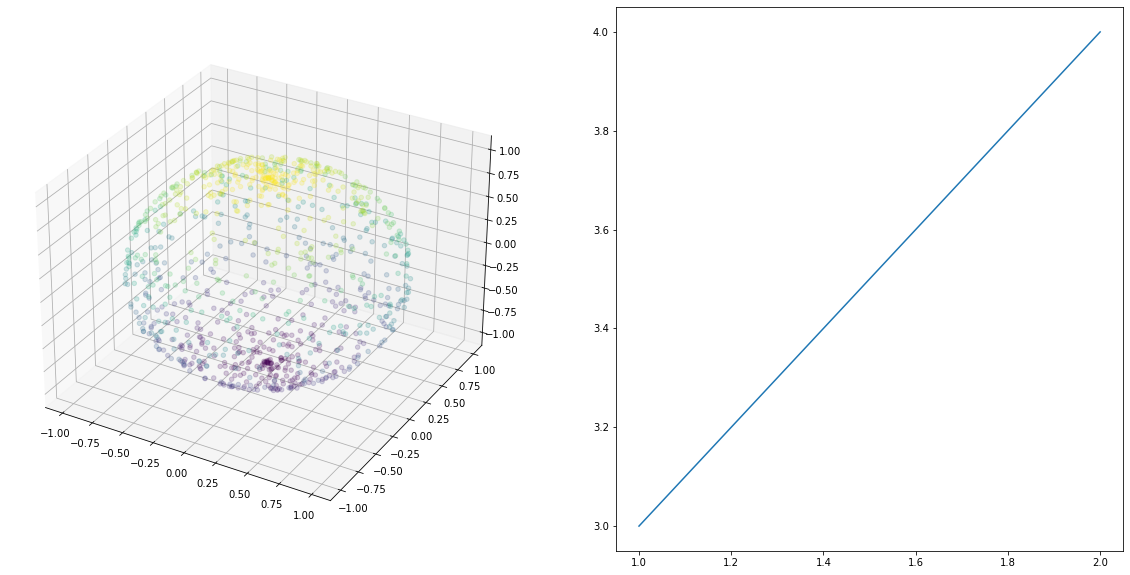

In [16]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2)

ax.scatter3D(sphere[:, 0], sphere[:, 1], sphere[:,     2], alpha=0.2, c=sphere[:, 2])
ax1.plot([1,2], [3,4])

fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'scatter3D'

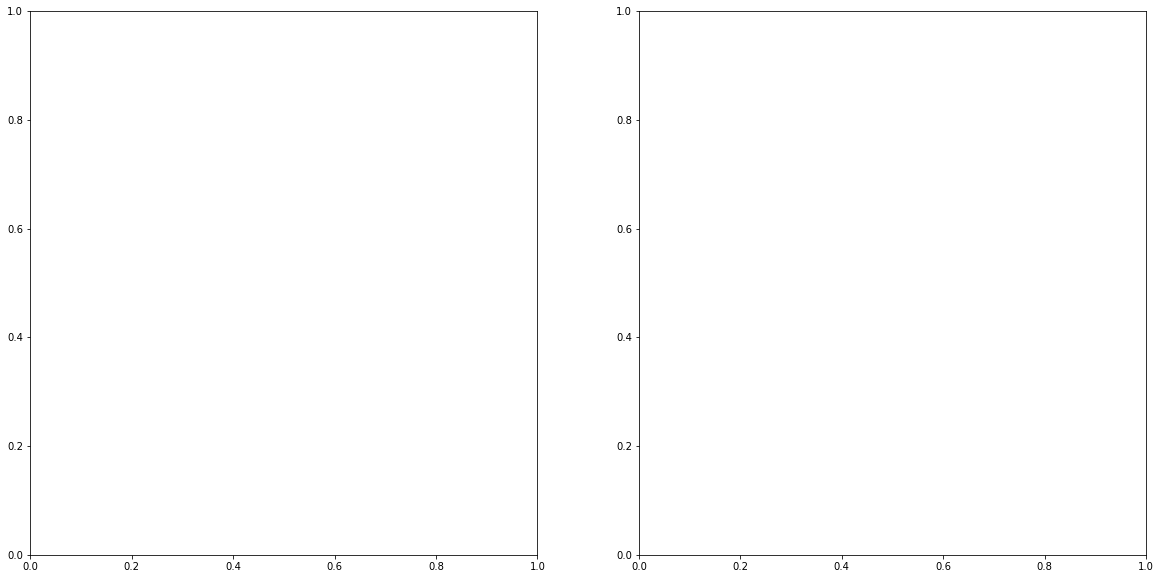

In [9]:
_, axes = plt.subplots(1, 2, figsize=(20, 10))
_.gca(projection = '3d')
axes[0].scatter3D(sphere[:, 0], sphere[:, 1], sphere[:,     2], alpha=0.2, c=sphere[:, 2])
axes[1].scatter([0,1], [2,3])

In [14]:
S = rml.Simplex()
S.build_simplex(sphere, k=10, threshold_var=0.08, edge_sen=2)
e = S.normal_coords()
E = S.coords[e]
EE = S.pointcloud[e]

p_idx : 841
840


In [79]:
len(S.coords)

1025

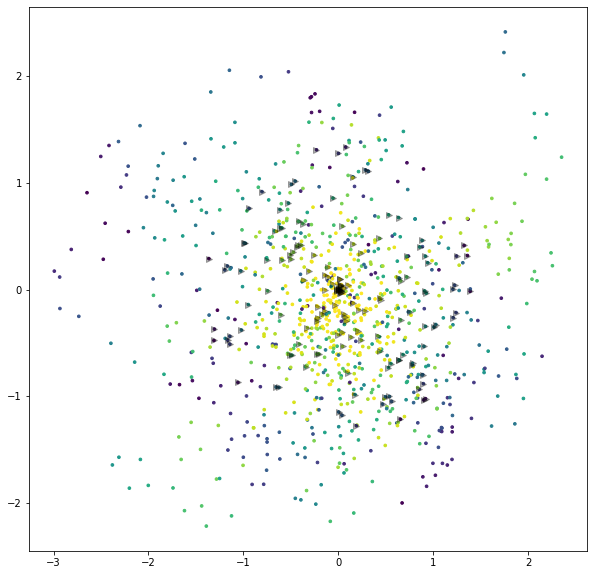

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(S.coords[:, 0], S.coords[:, 1],  c=sphere[:, 2], s=7)
plt.scatter(E[:, 0], E[:, 1], alpha=0.3, marker='>', color='black')

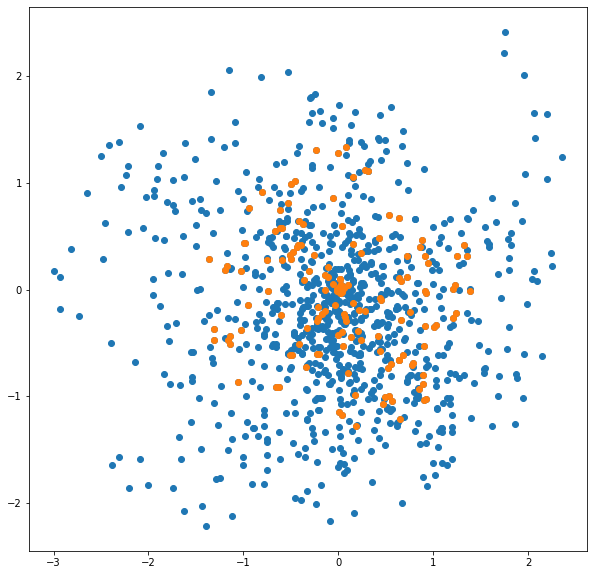

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(S.coords[:, 0], S.coords[:, 1])
plt.scatter(E[:, 0], E[:, 1])

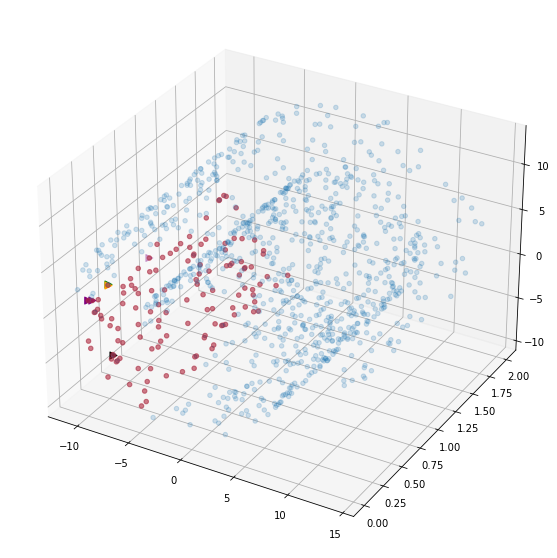

In [63]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection = '3d')
ax.scatter3D(swiss[:, 0], swiss[:, 1], swiss[:, 2], alpha=0.2)

ax.scatter3D(swiss[[p_idx], 0], swiss[[p_idx], 1], swiss[[p_idx], 2], color='black', marker= '>', s=50)  # p
ax.scatter3D(swiss[[idx], 0], swiss[[idx], 1], swiss[[idx], 2], color='g', marker= '>', s=50)  # new point
ax.scatter3D(swiss[[pred], 0], swiss[[pred], 1], swiss[[pred], 2], color='orange', marker= '>', s=50)  # predecessor
ax.scatter3D(swiss[[computed_points_b], 0], swiss[[computed_points_b], 1], swiss[[computed_points_b], 2], color='purple', marker= '>', s=50) 


ax.scatter3D(swiss[[computed_points0], 0], swiss[[computed_points0], 1], swiss[[computed_points0], 2], color='r', alpha=0.5)


#ax.scatter3D(swiss[[360, 704, 659, 824, 193], 0], swiss[[360, 704, 659, 824, 193], 1], swiss[[360, 704, 659, 824, 193], 2], color='r')
#ax.scatter3D(swiss[[824], 0], swiss[[824], 1], swiss[[824], 2], color='g')

In [104]:
def f():
    a = [0,1,2,3,4]
    def g():
        a.append(5)
    g()
    print(a)

f()

[0, 1, 2, 3, 4, 5]


In [106]:
from rml import test_rml
S = rml.test_rml.Simplex()
#S.build_simplex(sphere, k=10, threshold_var=0.08, edge_sen=2)
#e = S.normal_coords()
#E = S.coords[e]
#EE = S.pointcloud[e]

ImportError: cannot import name 'test_rml' from 'rml' (/home/lz1919/Documents/UNI/year_three/summer_tda/code/summer_tda/rml_pack/rml/__init__.py)